#                                    PROJECT 1

In this project,we need to predict **Loan status detection**.

Features: 

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

In [ ]:
train=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv.csv")
test=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv.csv")

In [ ]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


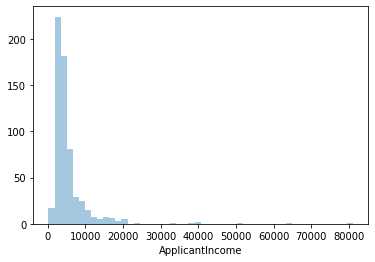

In [ ]:
sns.distplot(train.ApplicantIncome,kde=False)

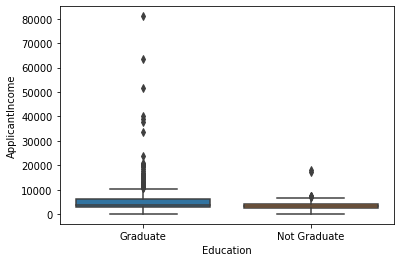

In [ ]:
sns.boxplot(x='Education',y='ApplicantIncome',data=train)

▶ People with a credit history a way more likely to pay their loan.A value close to 1 indicates a high loan success rate.

In [ ]:
modified=train
modified['Loan_Status']=train['Loan_Status'].apply(lambda x: 0 if x=="N" else 1 )
#calculate the mean
modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Probability of getting loan by credit history')

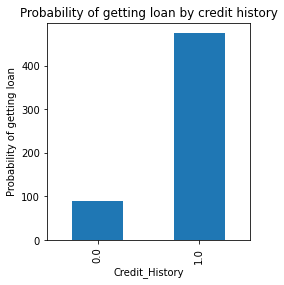

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(122)
train['Credit_History'].value_counts(ascending=True).plot(kind = 'bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan by credit history")

▶ Let's now deal with the missing value and check how many are there for each variable.

In [ ]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

▶ There are various missing values and some of them are categorical variables so
we need to find relations between data and plot data to estimate the missing values more accurately.

Let's find the basic correlations in the data

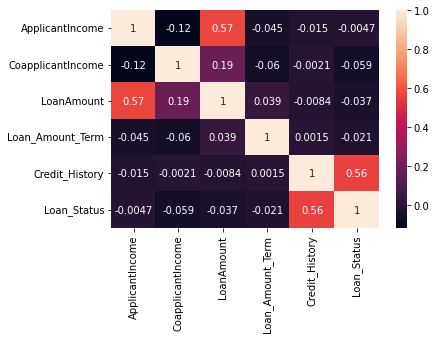

In [ ]:
# Plotting a correlation heatmap
sns.heatmap(train.corr(), annot = True)

▶ For numerical values a good solution is to fill missing values with the mean categorical we can fill them with the mode (the value with the highest frequency)

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

▶ Now we have to handle the outliers ,one solution is just to remove them but we are using log transform to nullify their effect

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


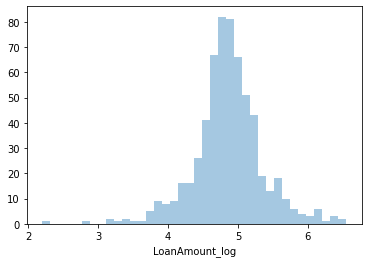

In [ ]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
sns.distplot(train.LoanAmount_log,kde=False)

▶ Now the distribution looks much closer to **normal** and effect of extreme values(outliers) has been significantly reduced.

▶ Another aspect can be that some applicants may have lower income but strong support Co-applicants.So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


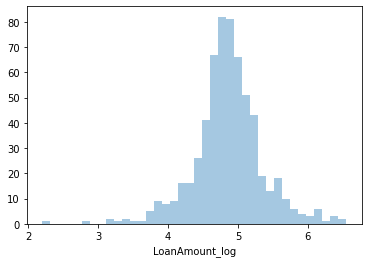

In [ ]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
sns.distplot(train.LoanAmount_log,kde=False)

▶ Now for using sklearn for our models,we need to turn all the categorical variables into numbers. We’ll do that using the LabelEncoder in sklearn.

In [ ]:
from sklearn.preprocessing import LabelEncoder
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder= LabelEncoder()
for i in category:   
  train[i] = encoder.fit_transform(train[i]) 

In [ ]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

▶ Now we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores.

Now we can test different models we are starting with

# **Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import svm
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
  #Perform k-fold cross-validation with 5 folds
  k=5
  kf = KFold(n_splits=k, random_state=None)
  error = []
  for train, test in kf.split(predictions):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [ ]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


# **Decision Tree**


In [ ]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education'] 
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [ ]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount']
classification_model(model,train,predictor_var,outcome_var)
# Over Fitting Example

Accuracy : 89.414%
Cross-Validation Score : 68.718%


# **Support Vector Machine** 

In [ ]:
model=svm.SVC(kernel='linear')
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


# **Random Forest Tree**

In [ ]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log','TotalIncome_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.525%


In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Gender','Married','Self_Employed','Dependents','Property_Area']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 82.899%
Cross-Validation Score : 80.135%


Here,although accuracy decreases but cross-validation score increases indicating more generalized model.


------

---------






